In [1]:
# Importation des librairies

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

Dimensions de X : (100, 2)
Dimensions de y : (100, 1)


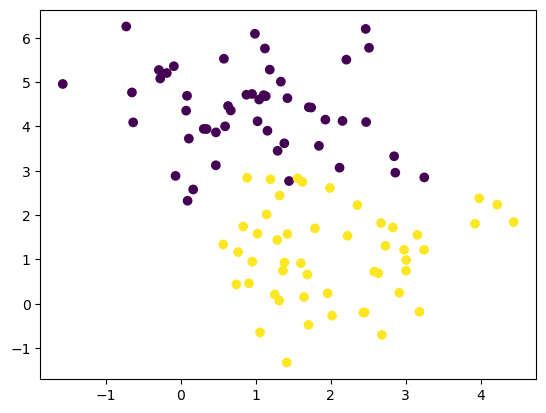

In [2]:
# Préparation du dataset

X,y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 0)
y = y.reshape((y.shape[0], 1))

print('Dimensions de X :', X.shape)
print('Dimensions de y :', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.show()

In [3]:
# Fonction d'initialisation

def initialisation(X) :
    W = np.random.randn(X.shape[1], 1) # Récupère le nombre de variables de X
    b = np.random.randn(1)
    return (W,b)

In [4]:
# Test

W,b = initialisation(X)
W.shape

(2, 1)

In [5]:
b.shape

(1,)

In [6]:
# Fonction du modèle

def model(X, W, b) :
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [7]:
# Test

A = model(X, W, b)
A.shape

(100, 1)

In [8]:
# Fonction coût

def log_loss(A, y) :
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [9]:
# Test

log_loss(A, y)

2.4023230634496127

In [10]:
# Fonction des Gradients

def gradients(A, X, y) :
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [11]:
# Test

dW, db = gradients(A, X, y)
dW.shape

(2, 1)

In [12]:
db

0.46847429784884237

In [13]:
# Fonction de mise à jour

def update(dW, db, W, b, learning_rate) :
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [49]:
# Fonction de prédiction

def predict(X, W, b) :
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

In [63]:
# Fonction neurone artificiel

def artificial_neuron(X, y, learning_rate=0.1, n_iter=100) :
    # Initialisation des paramètres
    W, b = initialisation (X)
    
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return(W, b)

0.92


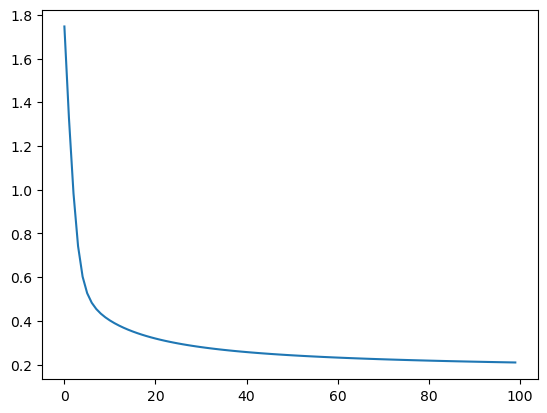

In [65]:
# Test

W, b = artificial_neuron(X, y)

In [55]:
W, b

(array([[ 0.90643883],
        [-1.08549517]]),
 array([1.18896232]))

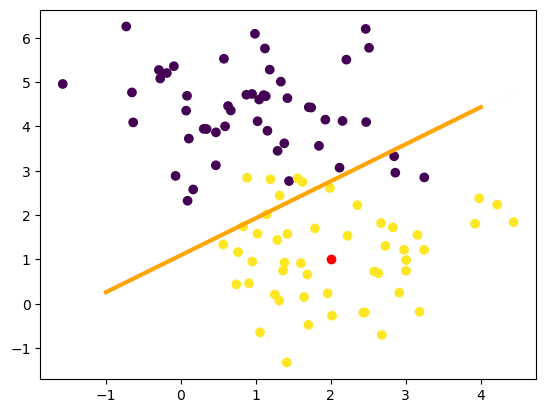

array([ True])

In [61]:
new_plant = np.array([2,1])
x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 - b ) / W[1]


plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)

plt.show()

predict(new_plant, W, b)